In [1]:
#Importing the modules
import numpy as np 
from sklearn import tree,linear_model
import pandas as pd 
import matplotlib.pyplot as plt

In [23]:
#Loading the data sets
df = pd.read_csv('Datasets/covid_19_clean_data_Daywise(23-march).csv')
Days = np.array(df['Days'])
Confirmed = np.array(df['Confirmed'])
Deaths = np.array(df['Deaths'])
Recovered = np.array(df['Recovered'])
print(Days[57:62])
print(Confirmed[57:62])
print(Deaths[57:62])
print(Recovered[57:62])

[58 59 60 61]
[242708 272166 304524 335955]
[ 9867 11299 12973 14632]
[84854 87256 91499 97704]


[22 11 36 59 27 21 42 24 31 39 10 46 14 47 34  1 56 32  4 28 13 25  6 57
 45 51 12 52  7 18 49 30  9 33 19 50 23  8 58 55 20 16 17 37 35  0 15 60
 29  5 38 41 53  3 40 54 26 44  2 43 48]


In [11]:
#Function for training the model with decision tree
#Parameter of the functions are:
    #1. x = All input feature
    #2. y = All output feature
    #3. x_train = input feature training set
    #4. x_test = input feature testing set
    #5. y_train = output feature training set
    #6. y_test = output feature testing set
def model_train(x,y,x_train,x_test,y_train,y_test):
    #variable declearition 
    training_error = []
    testing_error = []

    for i in range(1,9):
        #cereating the model instence with variable maximum depth
        model = tree.DecisionTreeRegressor(max_depth=i)
        
        #reshapeing the traind data to fin into the model
        x_train_fitting = np.matrix(x_train.reshape(len(x_train),1))
        y_train_fitting = np.matrix(y_train.reshape(len(y_train),1))
        
        #fitting the data in the model
        model.fit(x_train_fitting,y_train_fitting)
        
        #prideiction of model
        predict_model = model.predict(x.reshape(len(x),1))
        
        #ploting the curve
        plt.plot(x,y,color="red")#plot y v/s x in dots
        plt.plot(x.reshape(len(x),1),predict_model)
        plt.title('Line Fitting on max_depth='+str(i))
        plt.show()
        
        #calcutaing error
        #square mean error for traning data
        mean_traning_error = np.mean((y_train - model.predict(x_train.reshape(len(x_train),1)))**2)
        print("Square mean errer(train)=",mean_traning_error)
        
        #square mean error for testing data
        mean_test_error = np.mean((y_test - model.predict(x_test.reshape(len(x_test),1)))**2)
        print("Square mean errer(test)=",mean_test_error)
        
        
        #error matrix
        training_error.append(mean_traning_error)
        testing_error.append(mean_test_error)
        
    #ploting error curve
    print('training_error',training_error)
    print('testing_error',testing_error)
    print('Confirmed_test',Confirmed_test)
    plt.figure()
    plt.plot(training_error,c='red')
    plt.plot(testing_error,c='blue')
    plt.legend(['Trainig_Error','Testing_Error'])
    plt.show()

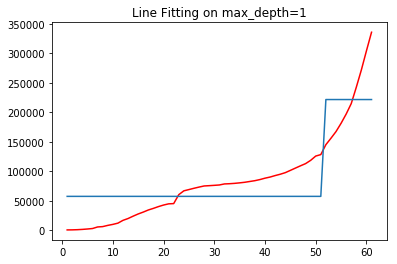

Square mean errer(train)= 1804563190.7640085
Square mean errer(test)= 2849991641.5664062


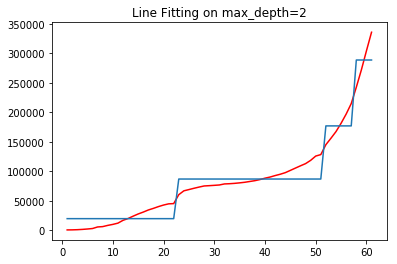

Square mean errer(train)= 366920946.90802324
Square mean errer(test)= 490780722.8094304


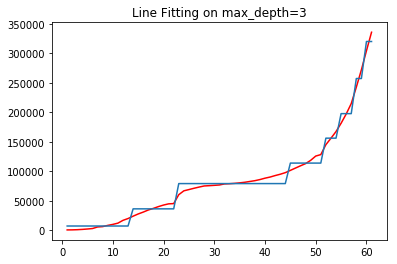

Square mean errer(train)= 81678247.68466064
Square mean errer(test)= 134843751.63742444


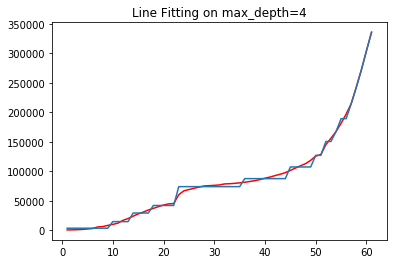

Square mean errer(train)= 18142379.25444297
Square mean errer(test)= 78416649.77083333


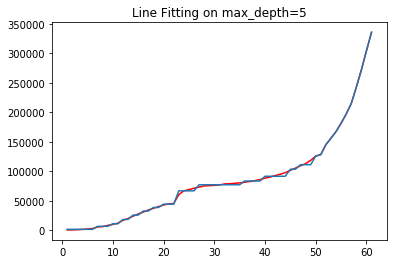

Square mean errer(train)= 3416474.296072797
Square mean errer(test)= 30833685.224166665


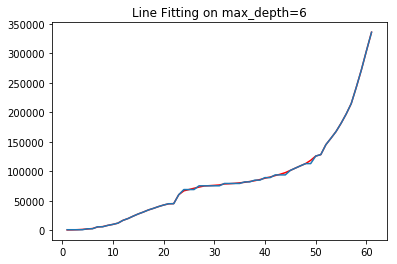

Square mean errer(train)= 462163.87729885057
Square mean errer(test)= 15121602.120370371


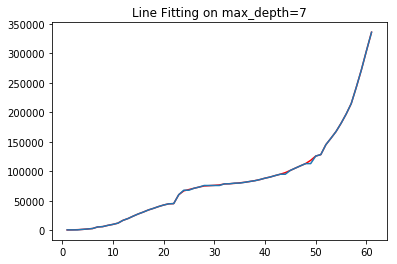

Square mean errer(train)= 74409.99568965517
Square mean errer(test)= 12716945.333333334


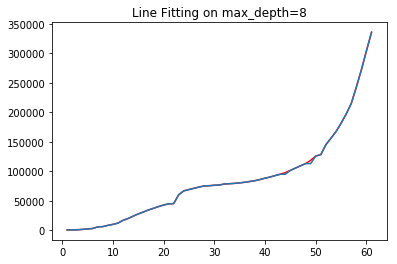

Square mean errer(train)= 5537.801724137931
Square mean errer(test)= 12706769.666666666
training_error [1804563190.7640085, 366920946.90802324, 81678247.68466064, 18142379.25444297, 3416474.296072797, 462163.87729885057, 74409.99568965517, 5537.801724137931]
testing_error [2849991641.5664062, 490780722.8094304, 134843751.63742444, 78416649.77083333, 30833685.224166665, 15121602.120370371, 12716945.333333334, 12706769.666666666]
Confirmed_test [   939  97710 118592]


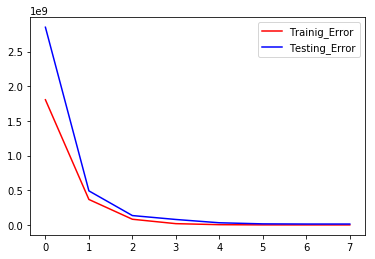

In [12]:
#Calling the model function for confirmed cases
model_train(Days,Confirmed,Days_train,Days_test,Confirmed_train,Confirmed_test)



In [13]:
#Function for training the model with decision tree
#Parameter of the functions are:
    #1. x_train = input feature training set
    #2. x_test = input feature testing set
    #3. y_train = output feature training set
    #4. y_test = output feature testing set
    
def model_train(x_train,y_train):
    #variable declearition 
    training_error = []
    testing_error = []

    for i in range(1,20):
        #cereating the model instence with variable maximum depth
        model = tree.DecisionTreeRegressor(max_depth=i)
        
        #reshapeing the traind data to fin into the model
        x_train_fitting = np.matrix(x_train.reshape(len(x_train),1))
        y_train_fitting = np.matrix(y_train.reshape(len(y_train),1))
        
        #fitting the data in the model
        return(model.fit(x_train_fitting,y_train_fitting))
        

In [26]:
#Calling the Desion Tree regrassing function
model = model_train(Days_train,Confirmed_train)
pre_Days = Days_test  #np.array([70])
print(pre_Days)
predict = model.predict(pre_Days.reshape(len(pre_Days),1))
print(predict)

[ 3 44 49]
[[-23061.65713084]
 [136646.16930786]
 [156122.73350771]]


In [27]:
#Using Linear Regression 
#Function for training the model with decision tree
#Parameter of the functions are:
    #1. x_train = input feature training set
    #2. x_test = input feature testing set
    #3. y_train = output feature training set
    #4. y_test = output feature testing set
    
def model_train(x_train,y_train):
    #fitting the data into the model
    model = linear_model.LinearRegression()#Creating instance of linear model
    #sklearn takes input as matrix so the we have to reshape the matrix into colloum matrix
    x_train_for_fittng = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_fittng = np.matrix(y_train.reshape(len(y_train),1))
    #print(x_train_for_fittng)
    #print(y_train_for_fittng)

    #fit the data into the model
    return(model.fit(x_train_for_fittng,y_train_for_fittng))


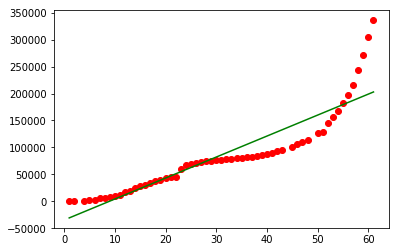

In [28]:
#Calling the Linear regrassing function
model = model_train(Days_train,Confirmed_train)
model_prediction = model.predict(Days.reshape((len(Days),1)))
#print(model_prediction)
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days.reshape((len(Days),1)),model_prediction,color="green")

In [30]:
pre_Days = np.array([60])
print(pre_Days)
predict = model.predict(pre_Days.reshape(len(pre_Days),1))
print(predict)

[60]
[[198971.17474736]]


In [19]:
#Evaluating the model
mean_test_error = np.mean( (Confirmed_test - model.predict(Days_test.reshape(len(Days_test),1)))**2 )

print('Test MSE: ', mean_test_error)

Test MSE:  1184349042.076015
